### Perceptron

Imports

In [57]:
import numpy as np

Perceptron Class

In [58]:
class Perceptron:

    """
    Parameters
    ----------
    eta: is the learning rate, can go from 0.00 to 1.00
    n_iter: is the number of iterations, the maximum number of iterations is called epochs
    random_state: is the seed for the numpy random number generator for initializing the weights
    
    Attributes
    ----------
    
    w_ : the weights vector
    b_ : the bias value
    
    
    
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    
    def fit(self, X, y):
        """
        Fit training data
        :param X: shape is (n_examples, n_features)
        :param y: shape is (n_examples), is the target values array
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float32(0.)
        self.errors_ = []
        
        while True:
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
                
            self.errors_.append(errors)
            if errors == 0: 
                    break
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

### Training

Loading dataset

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(s, header=None, encoding=u'utf-8')

print(df.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


Extracting only useful features

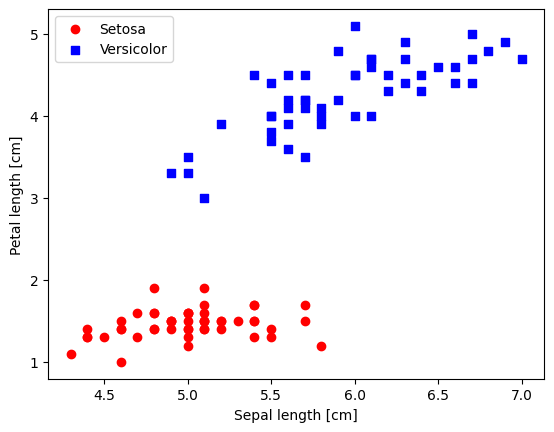

In [61]:
# Select only setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# Extract sepal and petal length
X = df.iloc[0:100, [0, 2]].values

# Plot data
plt.scatter(X[:50, 0], X[:50, 1], c='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], c='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Training

2024-09-19 16:45:47.705808
2024-09-19 16:45:47.709863
total time:  0:00:00.004055


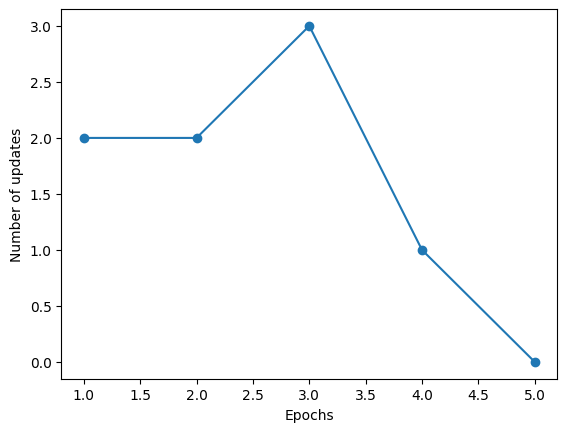

In [62]:
from datetime import datetime

ppn = Perceptron(eta=0.01, n_iter=6)
start = datetime.now()
print(start)
ppn.fit(X, y)

end = datetime.now()
print(end)
print("total time: ", end - start)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()